# Homework 2 - eCommerce analytics
E-commerce, also known as electronic commerce or internet commerce, refers to the buying and selling of goods or services using the internet, and the transfer of money and data to execute these transactions. The first e-commerce implementations date back to the 1990s and since then, millions of people every day visit some e-commerce sites to look for some product or service and, eventually, to purchase it.

You have been hired as a data scientist from a big multi-category online store. You and your team have been required to perform an analysis of the customer behavior in the store. Each row in the dataset represents an event, which catches different interactions (views, a product added/removed to/from the cart, purchases) of customers with your e-commerce. All events are related to products and users.

Your goal is to answer some research questions (RQs) that may help us discover and interpret meaningful patterns in data and eventually increase the number of sales.

The importation of library.

In [1]:
from collections import OrderedDict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter

# [RQ1]
A marketing funnel describes your customer’s journey with your e-commerce.
It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. \
Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. \
Which is the rate of complete funnels?

In [3]:
ds_count_event = pd.DataFrame( { 'counts_event' : pd.concat([pd.read_csv('D:/Storage file PC/Documenti/Università/Data Science/Anno 1/Semestre 1/Algorthmic Methods of Data Mining/Homeworks/HW2/2019-Oct.csv',\
                usecols=['user_session', 'event_type']), pd.read_csv('D:/Storage file PC/Documenti/Università/Data Science/Anno 1/Semestre 1/Algorthmic Methods of Data Mining/Homeworks/HW2/2019-Nov.csv',\
                usecols=['user_session', 'event_type'])]).groupby('user_session')['event_type'].value_counts() }).reset_index()

The number of complete funnels is rappresented by the number of tatal purchases on the number of total views.


In [3]:
complete_funnels_rate = ds_count_event[ds_count_event.event_type == 'purchase']['counts_event'].sum()*100/ds_count_event[ds_count_event.event_type == 'view']['counts_event'].sum()
print('The complete funnel rate is: ' + str(round(complete_funnels_rate, 2)) + "%")

The complete funnel rate is: 1.59%


What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc)

The dataframe created can also be used to print the plot for this question. 
In this case there is an operation that is not defined in the principal dataframe. This is the "remove from cart" operation. That can be calculated with the difference between purchase and cart.

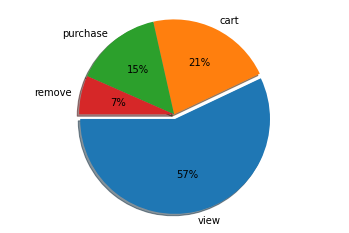

In [4]:
values = list()
values.append(ds_count_event[ds_count_event.event_type == 'view']['counts_event'].mean())
values.append(ds_count_event[ds_count_event.event_type == 'cart']['counts_event'].mean())
values.append(ds_count_event[ds_count_event.event_type == 'purchase']['counts_event'].mean())
values.append(values[-2]-values[-1])

labels = ['view', 'cart', 'purchase', 'remove']
explode = (0.05, 0, 0, 0)

fig1, ax1 = plt.subplots()
plt.rcParams['figure.figsize'] = (10, 10)
ax1.pie(values,
        explode=explode,
        labels=labels,
        autopct='%1.0f%%',
        shadow=True,
        startangle=180)
ax1.axis('equal')

plt.show()

How many times, on average, a user views a product before adding it to the cart?

In [ ]:
ds_count_event = pd.DataFrame( { 'counts_event' : pd.concat([pd.read_csv('D:/Storage file PC/Documenti/Università/Data Science/Anno 1/Semestre 1/Algorthmic Methods of Data Mining/Homeworks/HW2/2019-Oct.csv',\
                usecols=['user_session', 'event_type', 'product_id']),\
                pd.read_csv('D:/Storage file PC/Documenti/Università/Data Science/Anno 1/Semestre 1/Algorthmic Methods of Data Mining/Homeworks/HW2/2019-Nov.csv',\
                usecols=['user_session', 'event_type', 'product_id'])])\
                .groupby(['user_session', 'product_id'])\
                ['event_type'].value_counts() }).reset_index()

In [10]:
ds_cart = ds_count_event[ds_count_event.event_type == 'view']\
            .merge(pd.DataFrame(ds_count_event[ds_count_event.event_type == 'cart']\
            ['user_session']).reset_index(),\
            how = 'inner', on='user_session')\
            ['counts_event'].mean()

In [11]:
print("An user views a product before adding it to cart for average " + str(round(ds_cart)) + " times" )

An user views a product before adding it to cart for average 2 times


What’s the probability that products added once to the cart are effectively bought?

In [12]:
prob = round(ds_count_event[ds_count_event.event_type == 'purchase']['counts_event']\
             .sum()*100/ds_count_event[ds_count_event.event_type == 'cart']['counts_event'].sum(), 2)

print("The probability of products added once to the cart are bought is " + str(prob) + "%")

The probability of products added once to the cart are bought is 41.96%


What’s the average time an item stays in the cart before being removed?

The function for converting timedelta

In [2]:
def convert_timedelta(duration):
    days, seconds = duration.days, duration.seconds
    hours = days * 24 + seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = (seconds % 60)
    return str(hours), str(minutes), str(seconds)

In [9]:
ds_time = pd.concat([pd.read_csv('D:/Storage file PC/Documenti/Università/Data Science/Anno 1/Semestre 1/Algorthmic Methods of Data Mining/Homeworks/HW2/2019-Oct.csv',\
                     parse_dates=['event_time'], date_parser=pd.to_datetime,\
                    usecols=['event_time', 'user_session', 'product_id', 'event_type'])\
                    .drop_duplicates(subset=['user_session', 'product_id', 'event_type'],\
                    keep='first'), pd.read_csv('D:/Storage file PC/Documenti/Università/Data Science/Anno 1/Semestre 1/Algorthmic Methods of Data Mining/Homeworks/HW2/2019-Nov.csv',\
                     parse_dates=['event_time'], date_parser=pd.to_datetime, \
                    usecols=['event_time', 'user_session', 'product_id', 'event_type'])\
                    .drop_duplicates(subset=['user_session', 'product_id', 'event_type'],\
                    keep='first')])


In [10]:
ds_time = ds_time[ds_time.event_type == 'view'][['event_time', 'user_session', 'product_id']]\
            .merge(ds_time[ds_time.event_type == 'cart'][['event_time', 'user_session', 'product_id']],\
             on=['user_session', 'product_id'], how='inner', suffixes=('_v', '_c') )\
            .merge(ds_time[ds_time.event_type == 'purchase'][['event_time', 'user_session', 'product_id']],\
             on=['user_session', 'product_id'], how='inner').drop_duplicates(subset=['user_session', 'product_id'], keep='first') 

In our assumption a product removed is a product in cart not sold.
In this case the delta-time between remove_from_cart and cart events is the delta-time between purchase and cart.

In [11]:
val_rem = (ds_time['event_time'] - ds_time['event_time_c']).mean()

val_conv_rem = convert_timedelta(val_rem)

print("The delta time is " + val_conv_rem[0] + " hours, " + val_conv_rem[1] + " minutes and " + val_conv_rem[2] + " seconds")

The delta time is 0 hours, 1 minutes and 57 seconds


How much time passes on average between the first view time and a purchase/addition to cart?

The average delta time between the view operation and the cart or purchase one.

In [12]:
val = pd.concat([(ds_time['event_time'] - ds_time['event_time_v']),\
        (ds_time['event_time_c'] - ds_time['event_time_v'])],\
        ignore_index = True).mean()

val_conv = convert_timedelta(val)

print("The delta time is " + val_conv[0] + " hours, " + val_conv[1] + " minutes and " + val_conv[2] + " seconds")

The delta time is 0 hours, 4 minutes and 4 seconds


# [RQ2]
What are the categories of the most trending products overall? \
For each month visualize this information through a plot showing the number of sold products per category.
- Plot the most visited subcategories. 
- What are the 10 most sold products per category?

In this request we have considered a subcategory like a category. A product can be in a category or subcategory (category of category) or can not have a category. 
Assume that the trending category is the subcategory with the highest number of products sold.
In the output are escluded all nan category.

__Computating October month__

In [2]:
ds_Oct = pd.read_csv('D:/Storage file PC/Documenti/Università/Data Science/Anno 1/Semestre 1/Algorthmic Methods of Data Mining/Homeworks/HW2/2019-Oct.csv',\
            usecols=['category_code', 'event_type', 'product_id'])

The top 10 of category with the most popular products

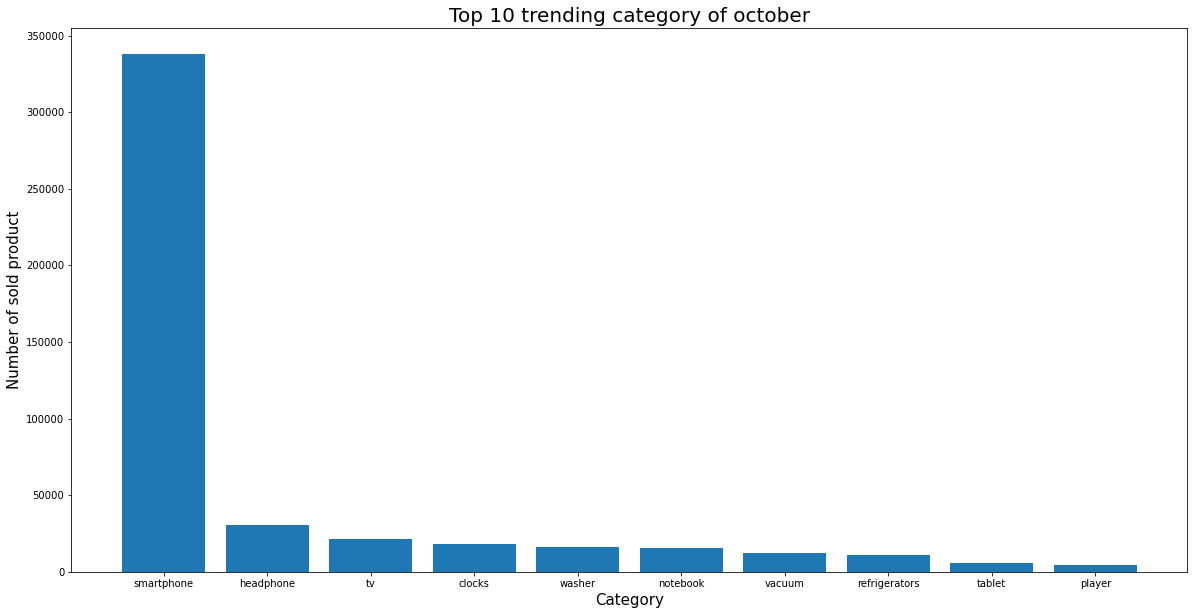

In [3]:
ds_trending_category_oct = pd.DataFrame({'count_product_sold' : ds_Oct[ds_Oct.event_type == 'purchase']\
                                                    .groupby('category_code')\
                                                    ['event_type'].value_counts()\
                                                    .sort_values(ascending=False)}).reset_index().dropna().head(10)


labels_prod_cat = [e.split('.')[-1] for e in list(ds_trending_category_oct['category_code'])]

plt.figure(figsize=(20, 10))
plt.bar(labels_prod_cat, ds_trending_category_oct['count_product_sold'])
plt.xlabel('Category', fontsize=15)
plt.ylabel('Number of sold product', fontsize=15)
plt.title('Top 10 trending category of october', fontsize=20)
plt.show()

The top 10 of category with the highest number of views

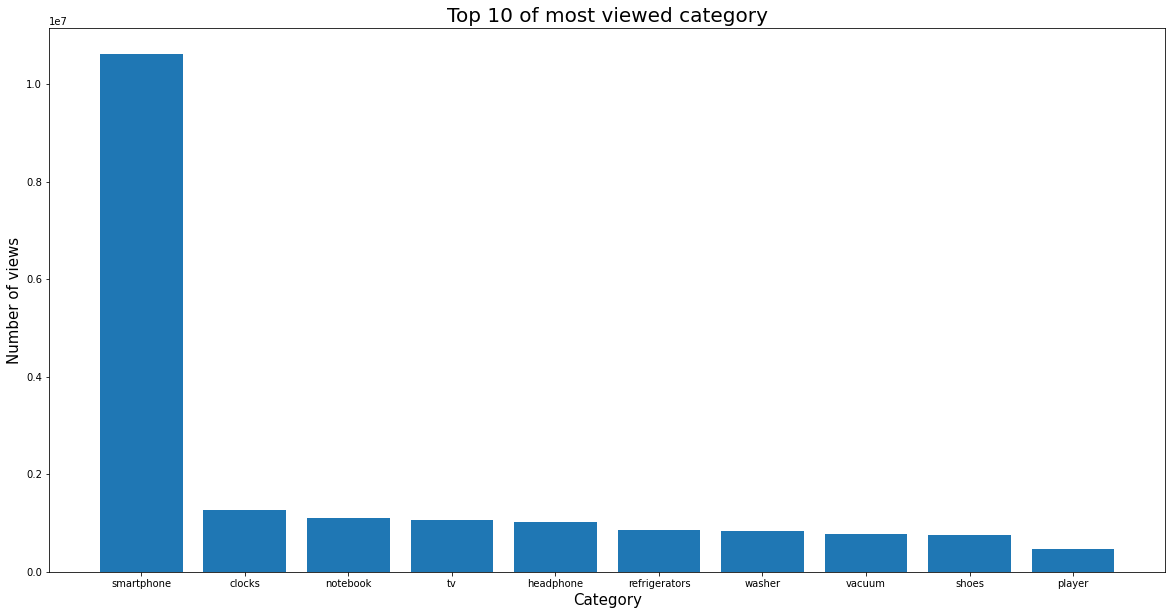

In [5]:
ds_most_viewed_category_oct = pd.DataFrame({'count_view' : ds_Oct[ds_Oct.event_type == 'view']\
                                                    .groupby('category_code')\
                                                    ['event_type'].value_counts()\
                                                    .sort_values(ascending=False)}).reset_index().dropna().head(10)


labels_most_viewed = [e.split('.')[-1].replace('_', ' ') for e in list(ds_most_viewed_category_oct['category_code'])]

plt.figure(figsize=(20, 10))
plt.bar(labels_most_viewed, ds_most_viewed_category_oct['count_view'])
plt.xlabel('Category', fontsize=15)
plt.ylabel('Number of views', fontsize=15)
plt.title('Top 10 of most viewed category', fontsize=20)
plt.show()

The 10 (or less) most sold products for category.

In [6]:
categories = set(ds_Oct[ds_Oct.event_type == 'purchase']['category_code'].dropna())

for c in categories:
    x = ds_Oct[(ds_Oct.category_code == c) & (ds_Oct.event_type=='purchase')]\
    .loc[:, 'product_id'].value_counts().head(10).to_string()
    print('''The 10 (or less) most sold product for ''' + c.split('.')[-1].replace('_', ' '))
    print(x)

The 10 (or less) most sold product for skates
12100045    106
12100230     66
12100513     60
12100567     44
12100456     35
12100563     31
12100605     29
12100784     29
12100630     20
12100825     16
The 10 (or less) most sold product for tshirt
43300017    8
43300016    5
43300107    3
43300127    3
43200112    2
43200109    2
43300035    2
43300051    2
43300053    2
43300130    2
The 10 (or less) most sold product for monitor
1701474    105
1700652     51
1700954     47
1701392     46
1701111     38
1701420     37
1701278     22
1701533     20
1700940     20
1701169     18
The 10 (or less) most sold product for bicycle
12202301    62
12201562    61
12200545    35
12201563    33
12202338    33
12202300    25
12201949    21
12201625    17
12201557    17
12201551    16
The 10 (or less) most sold product for cartrige
12900125    9
53400013    8
12901271    7
12900132    7
12901426    5
12900110    5
12900360    5
12900186    4
12900181    4
12900085    4
The 10 (or less) most sold

The 10 (or less) most sold product for moccasins
28718569    6
28718554    6
28718170    6
28716220    3
28714170    3
28714219    3
28719803    3
28716219    2
28714169    2
28716226    2
The 10 (or less) most sold product for jumper
56300077    2
The 10 (or less) most sold product for iron
3801134    509
3800548    360
3800979    226
3800751    216
3800985    148
3800310    121
3801063     90
3800966     76
3800980     75
3801211     67
The 10 (or less) most sold product for video
2300294    88
2300219    33
2300307    17
2300222    17
2300295    16
2300201    15
2300234    12
2300262    11
2300296     9
2300287     9
The 10 (or less) most sold product for videoregister
4700478    411
4700630    300
4700589    235
4700419    133
4700549     82
4700569     77
4700671     60
4700497     58
4700380     53
4700466     51
The 10 (or less) most sold product for coffee grinder
14500000    45
14500017    20
14500002    13
14500015     8
14500012     7
14500082     4
14500009     4
14500070  

The 10 (or less) most sold product for carriage
7004492    209
7004508    127
7002254    123
7005751    102
7004509     82
7005059     76
7005750     48
7006453     39
7005394     39
7005191     39
The 10 (or less) most sold product for trainer
26900073    50
26900059    33
26900065    30
27000036    28
27000002    25
26900008    17
26900009    17
27000010    15
26900058    13
26900017    13
The 10 (or less) most sold product for belt
28500054    8
28500041    3
28500051    2
28500038    2
28500003    2
28500026    1
28500043    1
28500007    1
28500037    1
The 10 (or less) most sold product for skirt
46200051    3
46200066    1
The 10 (or less) most sold product for fan
8600067    9
8600175    7
8600140    3
8600037    2
8600189    1
8600214    1
8600174    1
8600044    1
8600043    1
8600036    1
The 10 (or less) most sold product for mixer
10900305    224
10900306    108
10900250     79
10900328     74
10900168     62
10900348     48
10900349     46
10900096     41
10900003     39


__Computating November month__

In [2]:
ds_Nov = pd.read_csv('D:/Storage file PC/Documenti/Università/Data Science/Anno 1/Semestre 1/Algorthmic Methods of Data Mining/Homeworks/HW2/2019-Nov.csv',\
            usecols=['category_code', 'event_type', 'product_id'])

The top 10 of category with the most popular products

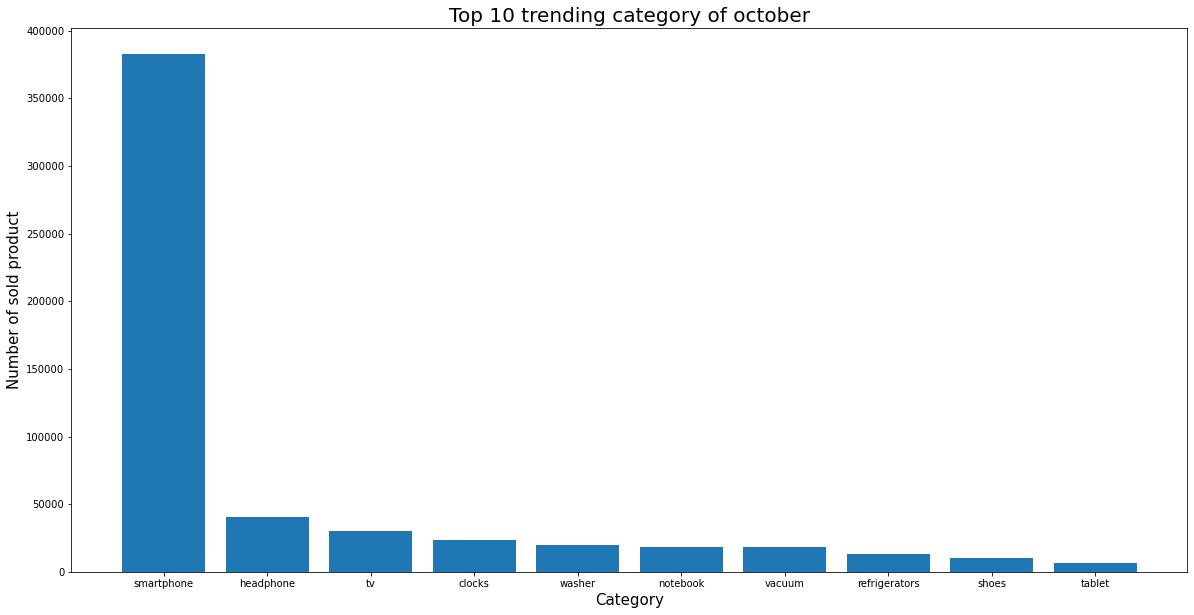

In [3]:
ds_trending_category_nov = pd.DataFrame({'count_product_sold' : ds_Nov[ds_Nov.event_type == 'purchase']\
                                                    .groupby('category_code')\
                                                    ['event_type'].value_counts()\
                                                    .sort_values(ascending=False)}).reset_index().dropna().head(10)

labels_prod_cat = [e.split('.')[-1] for e in list(ds_trending_category_nov['category_code'])]

plt.figure(figsize=(20, 10))
plt.bar(labels_prod_cat, ds_trending_category_nov['count_product_sold'])
plt.xlabel('Category', fontsize=15)
plt.ylabel('Number of sold product', fontsize=15)
plt.title('Top 10 trending category of october', fontsize=20)
plt.show()

The top 10 of category with the highest number of views

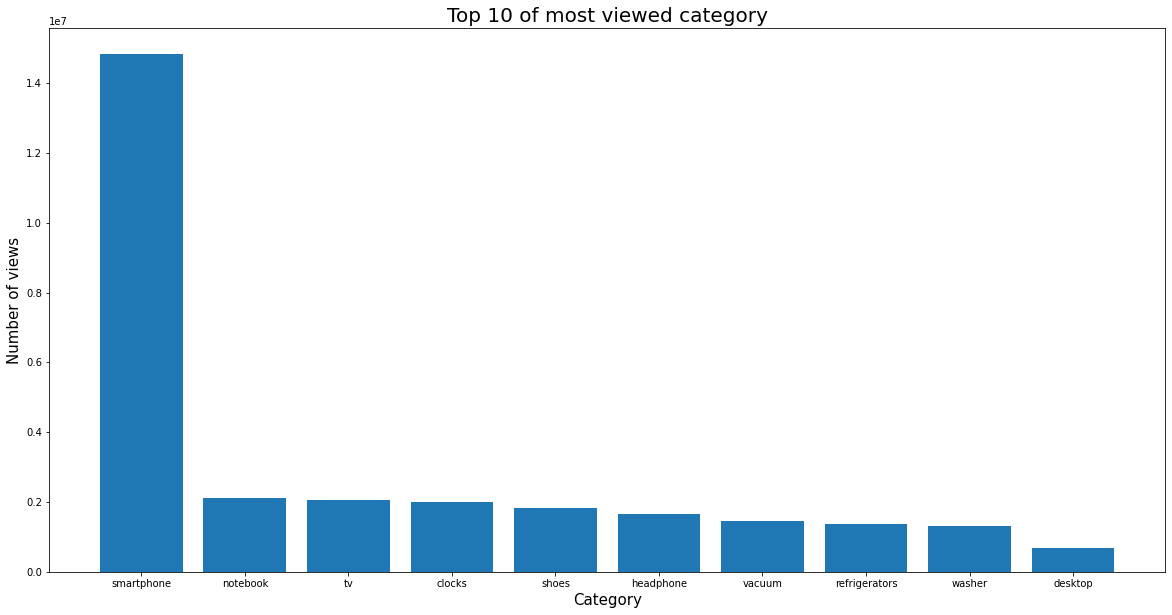

In [4]:
ds_most_viewed_category_nov = pd.DataFrame({'count_view' : ds_Nov[ds_Nov.event_type == 'view']\
                                                    .groupby('category_code')\
                                                    ['event_type'].value_counts()\
                                                    .sort_values(ascending=False)}).reset_index().dropna().head(10)


labels_most_viewed = [e.split('.')[-1].replace('_', ' ') for e in list(ds_most_viewed_category_nov['category_code'])]

plt.figure(figsize=(20, 10))
plt.bar(labels_most_viewed, ds_most_viewed_category_nov['count_view'])
plt.xlabel('Category', fontsize=15)
plt.ylabel('Number of views', fontsize=15)
plt.title('Top 10 of most viewed category', fontsize=20)
plt.show()

The 10 (or less) most sold products for category

In [5]:
categories = set(ds_Nov[ds_Nov.event_type == 'purchase']['category_code'].dropna())

for c in categories:
    x = ds_Nov[(ds_Nov.category_code == c) & (ds_Nov.event_type=='purchase')]\
        .loc[:, 'product_id'].value_counts().head(10).to_string()
    print('''The 10 (or less) most sold product for ''' + c.split('.')[-1].replace('_', ' '))
    print(x)

The 10 (or less) most sold product for underwear
100002304    3
100002393    2
35200674     2
35109087     2
35103209     2
35109130     2
35104650     2
35107571     2
35200681     2
35108970     2
The 10 (or less) most sold product for step ins
28720347    2
28720346    2
28705768    1
28720349    1
28713842    1
The 10 (or less) most sold product for toys
8902633    118
9002789     95
8900305     54
8902634     50
9002788     37
8901851     34
8902753     33
8901535     26
9002787     26
8901833     19
The 10 (or less) most sold product for pump
27700710    51
27700660    25
27700139    22
27700699    20
27700722    16
27700695    14
27700714    14
27700852    10
27700137     9
27701269     9
The 10 (or less) most sold product for power supply
9700230    30
9700231    29
9700060    24
9700278    18
9700359    12
9700227    11
9700234    11
9700217    11
9700076    10
9700137    10
The 10 (or less) most sold product for hdd
6800658    185
6800659    155
6800653     78
6800526     69


The 10 (or less) most sold product for blanket
23700131    20
23700138    17
23700201    12
23700105    11
23700132    11
23700307     8
23700127     8
23700203     6
23700092     6
23700113     6
The 10 (or less) most sold product for cpu
6400282    56
6400344    46
6400313    45
6400314    30
6400296    22
6400290    21
6400333    21
6400222    17
6400229    17
6400361    17
The 10 (or less) most sold product for fan
8600036    8
8600175    7
8600233    5
8600043    3
8600163    3
8600140    2
8600214    1
8600117    1
8600116    1
8600192    1
The 10 (or less) most sold product for massager
29100100    74
29100102    65
29100074    37
29100071    36
29100044    35
29100051    31
29100011    29
29100090    29
29100091    29
29100089    27
The 10 (or less) most sold product for alarm
6000094    1100
6000227     489
6000004     274
6000229     253
6000157     211
6000167     103
6000272     100
6000032      84
6000089      74
6000254      68
The 10 (or less) most sold product for dolls

The 10 (or less) most sold product for hammok
33700006    4
The 10 (or less) most sold product for player
5701166    274
5701128    246
5701002    244
5701086    182
5701246    127
5700518    114
5700384     98
5700619     90
5701058     83
5701247     80
The 10 (or less) most sold product for slipons
28710376    2
28717743    1
28714131    1
28708053    1
28710377    1
28710805    1
28705540    1
28705619    1
The 10 (or less) most sold product for belt
28500097    7
28500099    6
28500096    4
28500086    4
28500051    2
28500056    2
28500082    2
28500085    2
28500081    1
28500074    1
The 10 (or less) most sold product for microwave
2900958      903
2900090      357
2900561      297
2900569      292
2900022      287
2900934      265
2900200      209
2900957      199
2900954      175
100005527    133
The 10 (or less) most sold product for cooler
25900001    44
25900012    44
25900023    39
25900022    38
25900025    25
30901033    24
30900005    21
25900018    19
25900015    15
2

# [RQ3]
For each category, what’s the brand whose prices are higher on average?

In [3]:
ds_expensive_brand = pd.DataFrame({'avg_price' :\
                pd.concat([pd.read_csv('D:/Storage file PC/Documenti/Università/Data Science/Anno 1/Semestre 1/Algorthmic Methods of Data Mining/Homeworks/HW2/2019-Oct.csv',\
                usecols=['category_code', 'brand', 'price']),\
                pd.read_csv('D:/Storage file PC/Documenti/Università/Data Science/Anno 1/Semestre 1/Algorthmic Methods of Data Mining/Homeworks/HW2/2019-Nov.csv',\
                usecols=['category_code', 'brand', 'price'])])
                .groupby(['category_code', 'brand'])['price'].mean()\
                .sort_values(ascending=False)}).reset_index()

In [4]:
all_cat = list()
for c in ds_expensive_brand.category_code:
    if c not in all_cat:
        all_cat.append(c)

for c in all_cat:
    b = ds_expensive_brand[(ds_expensive_brand.category_code == c)]['brand']\
        .dropna().head(1).to_string(index=False).strip()
    print(c.split('.')[-1].replace('_', ' ') + ': ' + b)

acoustic: fly
bicycle: pinarello
trainer: nordictrack
ski: kessler
refrigerators: climadiff
notebook: dreammachines
washer: siemens
pump: helix
water heater: gree
clocks: rado
coffee machine: teka
bath: jacobdelafon
toilet: senspa
sofa: trevi
steam cooker: kuppersberg
desktop: apple
carriage: hartan
oven: kuppersbusch
skates: minimotors
projector: xiaomi
hood: kuppersbusch
microwave: kuppersberg
iron: laurastar
generator: senci
table: molodecnomebel
photo: tamron
air heater: tigerking
piano: ava
sewing machine: babylock
shoes: sergiorossi
cabinet: molodecnomebel
air conditioner: panasonic
dishwasher: smeg
welding: telwin
hob: kuppersbusch
compressor: schneider
videocards: evga
cpu: hpe
light: preciosa
tablet: microsoft
saw: festool
microphone: neumann
tv: kuppersbusch
video: panasonic
bed: grandmanar
mixer: kitchenaid
sandals: sergiorossi
lawn mower: viking
smartphone: apple
cultivator: husqvarna
monitor: asus
chair: aerocool
keds: sergiorossi
faucet: jacobdelafon
subwoofer: blam
vacuu

Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.

computers.peripherals.monitor


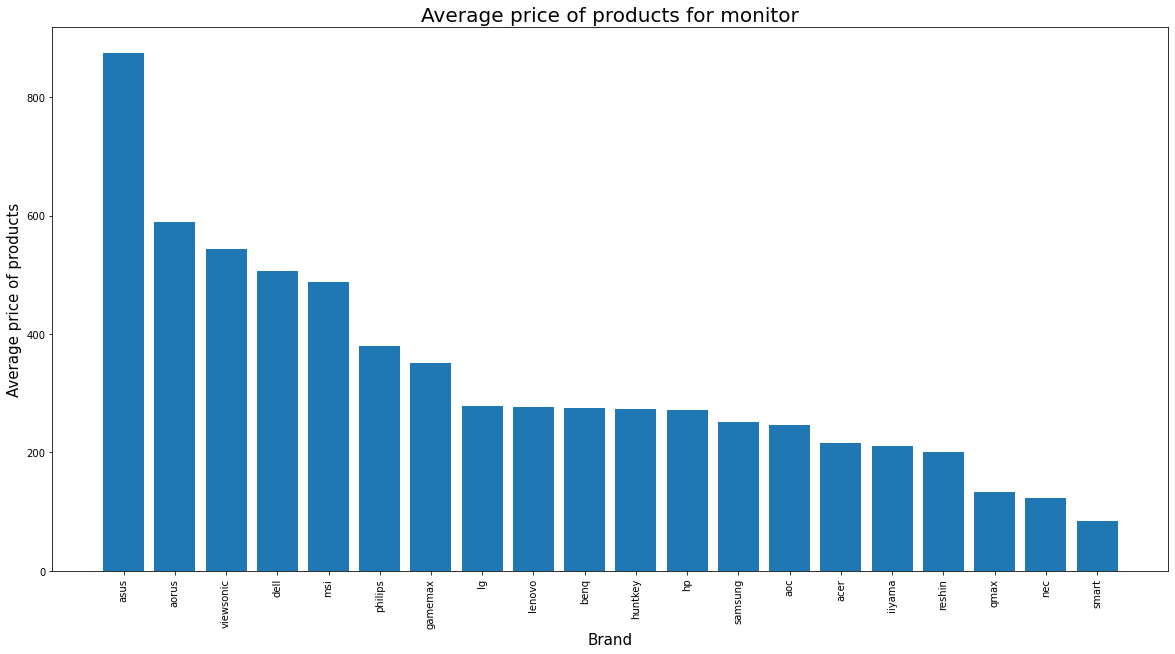

In [7]:
def brand_status():
    c = input().strip()

    plt.figure(figsize=(20, 10))
    plt.bar(ds_expensive_brand[ds_expensive_brand.category_code == c].brand,\
            ds_expensive_brand[ds_expensive_brand.category_code == c].avg_price)
    plt.xticks(rotation='vertical')
    plt.xlabel('Brand', fontsize=15)
    plt.ylabel('Average price of products', fontsize = 15)
    plt.title('Average price of products for ' + c.split('.')[-1].replace('_',' '), fontsize=20)
    plt.show()

brand_status()

Find, for each category, the brand with the highest average price.

Return all the results in ascending order by price.

In [8]:
l = []
for c in all_cat:
    l += [(c, ds_expensive_brand[ds_expensive_brand.category_code == c]['brand'].head(1).to_string(index=False).strip())]
for e in sorted(l, key=lambda tup: tup[1]):
    print(e[0].split('.')[-1].replace('_', ' ') + ': ' + e[1])

chair: aerocool
jacket: aivengo
ebooks: amazon
desktop: apple
smartphone: apple
keyboard: apple
mouse: apple
pillow: askona
blanket: askona
monitor: asus
power supply: asus
motherboard: asus
piano: ava
sewing machine: babylock
telephone: blackberry
videoregister: blackvue
subwoofer: blam
meat grinder: bork
headphone: bose
costume: burton
massager: casada
fryer: clatronic
refrigerators: climadiff
wallet: coccinelle
sock: cybex
camera: d-link
memory: dell
ironing board: delonghi
coffee grinder: delonghi
fan: deton
alarm: dowontec
notebook: dreammachines
videocards: evga
scarf: fabretti
player: farcar
saw: festool
drill: festool
acoustic: fly
scales: garmin
snowboard: gnu
bed: grandmanar
water heater: gree
step ins: greyder
carriage: hartan
glove: hayabusa
pump: helix
umbrella: hoco
cpu: hpe
hdd: hpe
toys: hubsan
cultivator: husqvarna
parktronic: incar
diapers: insinse
vacuum: irobot
bath: jacobdelafon
faucet: jacobdelafon
underwear: jasmine
ski: kessler
mixer: kitchenaid
blender: kitchen

# [RQ4]
How much does each brand earn per month?
Write a function that given the name of a brand in input returns, for each month, its profit.

An economic profit or loss is the difference between the revenue received from the sale of an output and the costs of all inputs used.
We don't have sufficient information to do that. For that reason we mean the profit as a sum of money received by purchasing products.

In [7]:
ds_Oct = pd.read_csv('D:/Storage file PC/Documenti/Università/Data Science/Anno 1/Semestre 1/Algorthmic Methods of Data Mining/Homeworks/HW2/2019-Oct.csv',\
                     usecols=['event_type', 'brand', 'price'])

ds_Nov = pd.read_csv('D:/Storage file PC/Documenti/Università/Data Science/Anno 1/Semestre 1/Algorthmic Methods of Data Mining/Homeworks/HW2/2019-Nov.csv',\
                     usecols=['event_type', 'brand', 'price'])

In [8]:
brands = set(ds_Oct[ds_Oct.event_type == 'purchase']['brand'].dropna()) & set(ds_Nov[ds_Nov.event_type == 'purchase']['brand'].dropna())

In [9]:
ds_Oct = ds_Oct[(ds_Oct.event_type == 'purchase')].groupby('brand')['price'].sum()

ds_Nov = ds_Nov[(ds_Nov.event_type == 'purchase')].groupby('brand')['price'].sum()

In [10]:
def brand_profit(brand):
    o = ds_Oct[brand]
    n = ds_Nov[brand]
    return o, n

This function below can be used to print the result of the previous function with a good presentation

In [11]:
def print_brand_profit():
    b = input().strip()
    o, n = brand_profit(b)
    print('Profit for october is ' + str(o))
    print('Profit for november is ' + str(n))

print_brand_profit()

apple
Profit for october is 111209268.82001185
Profit for november is 127512524.87999241


Is the average price of products of different brands significantly different?

To answer this question we can print for each category the average price of products from differents brands

In [12]:
for c in all_cat:
    x = ds_expensive_brand[['brand', 'avg_price']].loc[(ds_expensive_brand.category_code==c)]
    print(c.split('.')[1].replace('_', ' ') + ': \n' +  x.to_string(index=False, col_space=15))

audio: 
          brand       avg_price
            fly     2562.630000
       dynacord     1781.991944
       takamine     1664.649920
            blg     1589.135517
  electro-voice     1385.347976
            kef     1374.325981
          proel     1077.623085
     turbosound      937.535590
        edifier      927.759485
         samson      919.359357
          biema      901.051456
      soundking      877.118205
   studiomaster      848.147123
           leem      813.331619
           jamo      795.390000
           bose      716.019023
         peavey      638.820557
        liberty      630.238579
            krk      613.888710
            rcf      607.791764
           adam      602.186217
        ovation      568.209292
         mackie      561.623628
          ecler      523.633333
        gretsch      493.103109
       presonus      489.980000
         norman      483.929091
          candy      465.386207
       magaudio      426.668571
         fender      407.319454


            ivt       71.560000
smartphone: 
          brand       avg_price
          apple      937.315616
         google      727.456571
        oneplus      681.684615
         lenovo      617.520000
            umi      504.453837
           sony      438.131956
          leeco      360.006442
     blackberry      352.716581
        samsung      340.979344
             lg      304.729010
           oppo      302.883614
          honor      297.126078
           vivo      296.172690
         huawei      281.957093
           asus      235.199890
         xiaomi      229.991620
          nokia      215.980950
          meizu      159.178217
         leagoo      149.802398
          nubia      147.245540
         doogee      128.507340
        oukitel      110.249072
       motorola      106.263158
        tp-link      105.197247
          haier      103.686480
            htc      103.073112
          tecno      100.746743
         gionee       98.002749
         vertex       95.38

              natrol       11.998491
tools: 
          brand       avg_price
         wagner      376.872180
         metabo      256.521850
      schneider      148.805529
          ryobi      113.501024
          bosch      106.281577
          crown       53.283349
        patriot       52.855594
            dwt       50.452170
         p.i.t.       46.280000
          stels       45.018713
         alteco       44.246542
         wortex       31.554583
          paint       28.310000
          fubag       24.133873
             hp       21.359167
         kolner       20.651206
         matrix       18.195763
            eco       12.820632
jumper: 
          brand       avg_price
        weekend      373.240000
        persona      226.417216
          omero      119.701649
       catimini       62.197313
      didistyle       38.485769
        noopies       36.726667
         dirkje       24.500588
      blueseven       24.125510
    conceptclub       23.847191
       gaissina   

      clatronic           46.31
shoes: 
          brand       avg_price
        greyder       40.397837
         rieker       30.673860
           nike       29.600000
         crosby       27.260000
        respect       24.710000
underwear: 
          brand       avg_price
        jasmine       33.517523
      milavitsa       22.937315
      obsessive       20.340000
        noppies       17.776329
         kayser       13.620000
        visavis       10.431066
shorts: 
          brand       avg_price
      mangokids       32.690000
        carters       18.436800
        noppies       11.376000
        crockid        4.175368
fmcg: 
          brand       avg_price
        insinse       28.451520
           momi       25.285789
          moony       18.709332
        merries       18.330203
           goon       17.740000
          whito       16.730000
          goo.n       15.885098
        lovular       15.601387
           sabi       13.900000
          genki       13.837113
    

Using the function you just created, find the top 3 brands that have suffered the biggest losses in earnings between one month and the next, specifing both the loss percentage and the 2 months (e.g., brand_1 lost 20% between march and april).

The function must print the 3 cases of brands which they have a loss in the following month. (profit of november is less then october)

If there is the same value for one position returns the last one.
We assume that there are at least 3 brands at a loss.

In [19]:
v = [-1, -1, -1]
b = ['', '', '']

for brand in brands:
    o, n = brand_profit(brand)
    p = -1
    if n <= o : p = ((o-n)*100)/o
    for i in range(3):
        if p >= v[i]:
            b[i] = brand
            v[i] = p
            break

print(b[0] + ' lost ' + str(round(v[0], 2)) + '%' + ' between october and november')
print(b[1] + ' lost ' + str(round(v[1], 2)) + '%' + ' between october and november')
print(b[2] + ' lost ' + str(round(v[2], 2)) + '%' + ' between october and november')

jonnesway lost 96.62% between october and november
evga lost 95.9% between october and november
ventura lost 95.04% between october and november


# [RQ5]
In what part of the day is your store most visited? 
Knowing which days of the week or even which hours of the day shoppers are likely to visit your online store and make a purchase may help you improve your strategies. Create a plot that for each day of the week show the hourly average of visitors your store has.

In [2]:
ds = pd.concat([pd.read_csv('D:/Storage file PC/Documenti/Università/Data Science/Anno 1/Semestre 1/Algorthmic Methods of Data Mining/Homeworks/HW2/2019-Oct.csv',\
                    parse_dates=['event_time'], date_parser=pd.to_datetime,\
                    usecols=['event_time', 'category_code', 'event_type']),\
                pd.read_csv('D:/Storage file PC/Documenti/Università/Data Science/Anno 1/Semestre 1/Algorthmic Methods of Data Mining/Homeworks/HW2/2019-Nov.csv',\
                    parse_dates=['event_time'], date_parser=pd.to_datetime, \
                    usecols=['event_time', 'category_code', 'event_type'])])

The code below prints a plot with the average of views for each day of the week

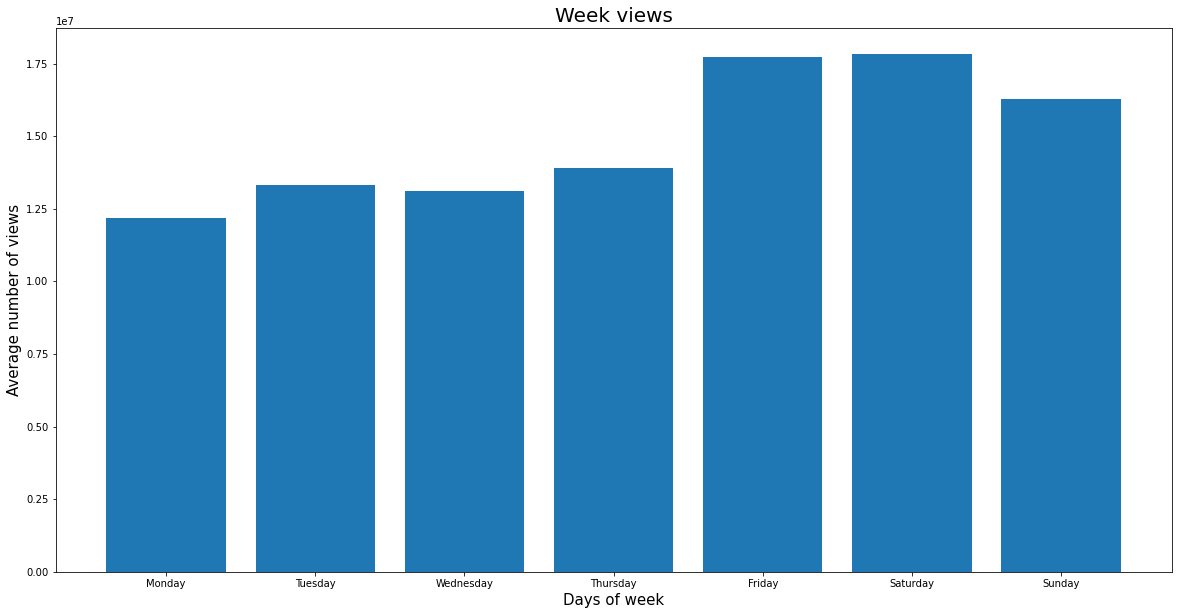

In [4]:
mon = ds[(ds.event_type == 'view') & (ds.event_time.dt.dayofweek == 0)]\
        .loc[:, 'event_type'].value_counts().mean()

tue = ds[(ds.event_type == 'view') & (ds.event_time.dt.dayofweek == 1)]\
        .loc[:, 'event_type'].value_counts().mean()

wed = ds[(ds.event_type == 'view') & (ds.event_time.dt.dayofweek == 2)]\
        .loc[:, 'event_type'].value_counts().mean()

thu = ds[(ds.event_type == 'view') & (ds.event_time.dt.dayofweek == 3)]\
        .loc[:, 'event_type'].value_counts().mean()

fri = ds[(ds.event_type == 'view') & (ds.event_time.dt.dayofweek == 4)]\
        .loc[:, 'event_type'].value_counts().mean()

sat = ds[(ds.event_type == 'view') & (ds.event_time.dt.dayofweek == 5)]\
        .loc[:, 'event_type'].value_counts().mean()

sun = ds[(ds.event_type == 'view') & (ds.event_time.dt.dayofweek == 6)]\
        .loc[:, 'event_type'].value_counts().mean()

plt.figure(figsize=(20, 10))
plt.bar(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], [mon, tue, wed, thu, fri, sat, sun])
plt.xlabel('Days of week', fontsize=15)
plt.ylabel('Average number of views', fontsize=15)
plt.title('Week views', fontsize=20)
plt.show()

The code below prints a plot with the average of views for each hour

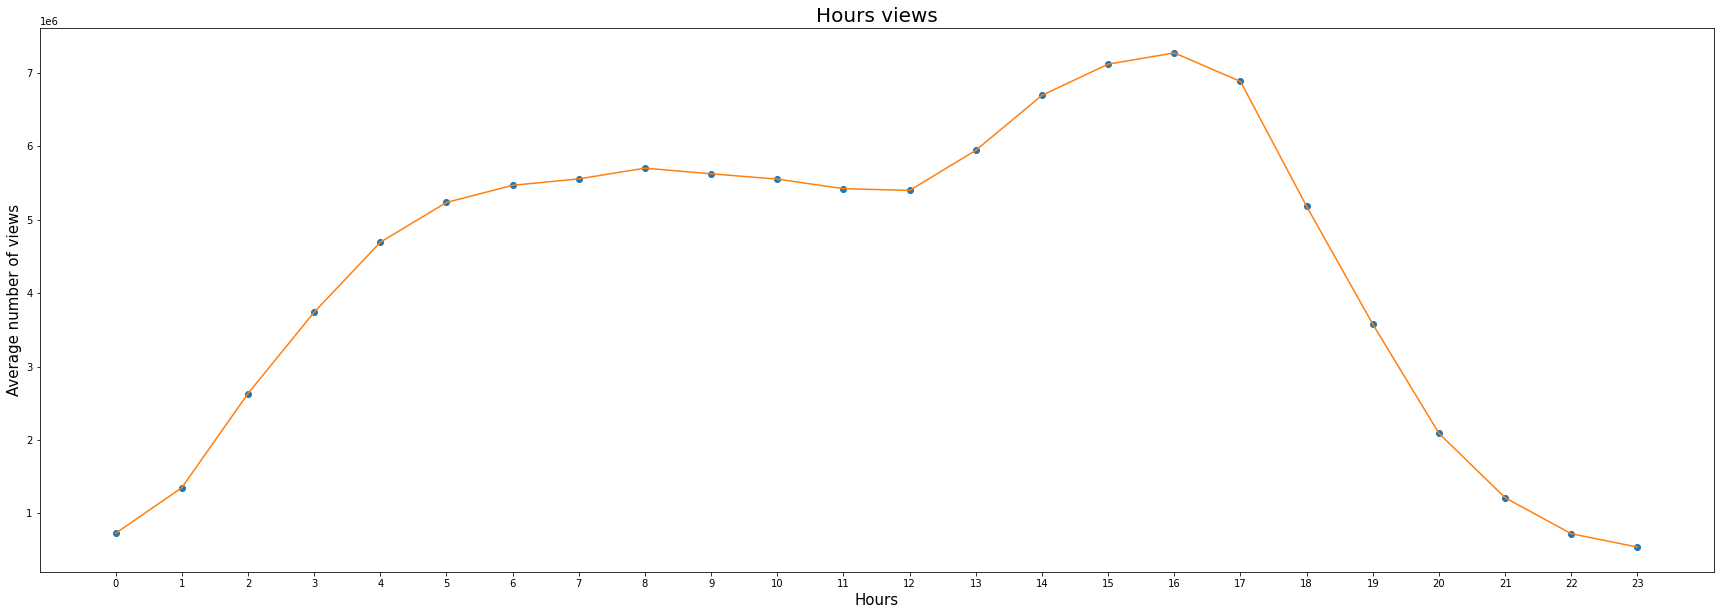

In [5]:
hours_label = [str(i) for i in range(24)]
hours_values = []

for h in range(24):
    hours_values.append(ds[(ds.event_type=='view') & (ds.event_time.dt.hour == h)].loc[:, 'event_type'].value_counts().mean())

plt.figure(figsize=(30, 10))
plt.plot_date(hours_label, hours_values)
plt.plot(hours_label, hours_values)
plt.xlabel('Hours', fontsize=15)
plt.ylabel('Average number of views', fontsize=15)
plt.title('Hours views', fontsize=20)
plt.show()

In the function below an user can input a day of week (ex: 'monday') and receive an "Hours view" plot for that day of week

monday


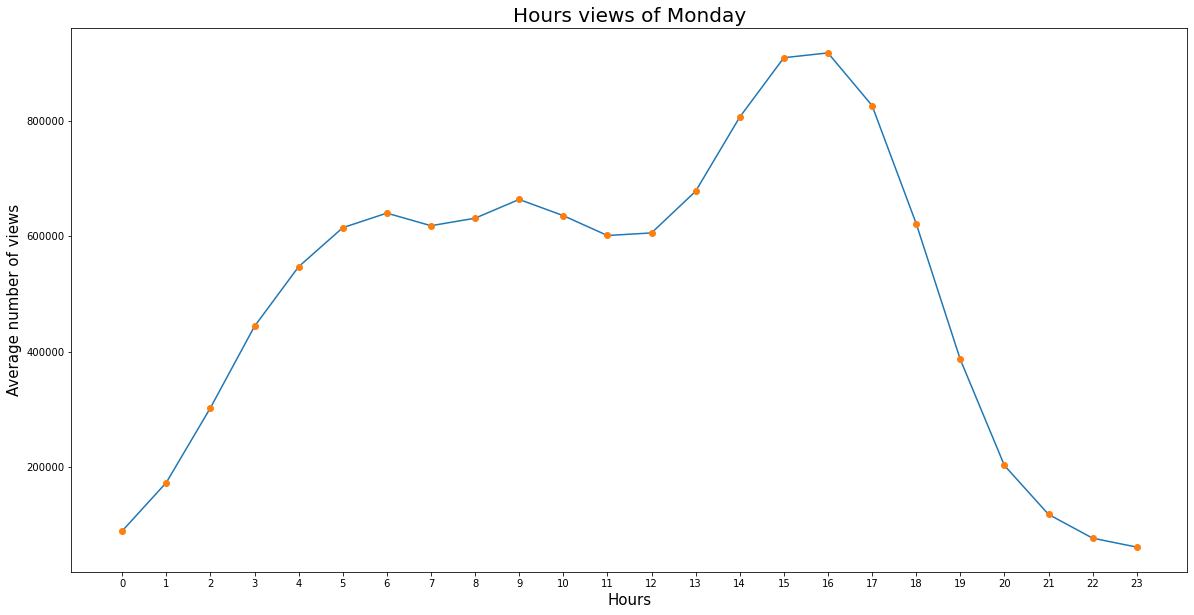

In [8]:
def dayweek_hours_views():

    d = input().strip().lower().capitalize()

    hours_label = [str(i) for i in range(24)]
    hours_values = []

    for h in range(24):
        hours_values.append(ds[(ds.event_time.dt.day_name()==d) & (ds.event_type=='view') & (ds.event_time.dt.hour == h)]\
            .loc[:, 'event_type'].value_counts().mean())

    plt.figure(figsize=(20, 10))
    plt.plot(hours_label, hours_values)
    plt.plot_date(hours_label, hours_values)
    plt.xlabel('Hours', fontsize=15)
    plt.ylabel('Average number of views', fontsize=15)
    plt.title('Hours views of ' + d, fontsize=20)
    plt.show()

dayweek_hours_views()

# [RQ6]
The conversion rate of a product is given by the purchase rate over the number of times the product has been visited.
What's the conversion rate of your online store?

Find the overall conversion rate of your store.

The conversion rate represents that value, expressed as a percentage, which summarizes the ability of your web pages to transform visitors into customers.

In [9]:
total_views = int(ds[ds.event_type == 'view'].loc[:, 'event_type'].value_counts())
total_purchase = int(ds[ds.event_type == 'purchase'].loc[:, 'event_type'].value_counts())

print('The conversion rate of the store is ' + str(total_purchase*100/total_views) + "%")

The conversion rate of the store is 1.5908179448283517%


Plot the purchase rate of each category and show the conversion rate of each category in decreasing order.

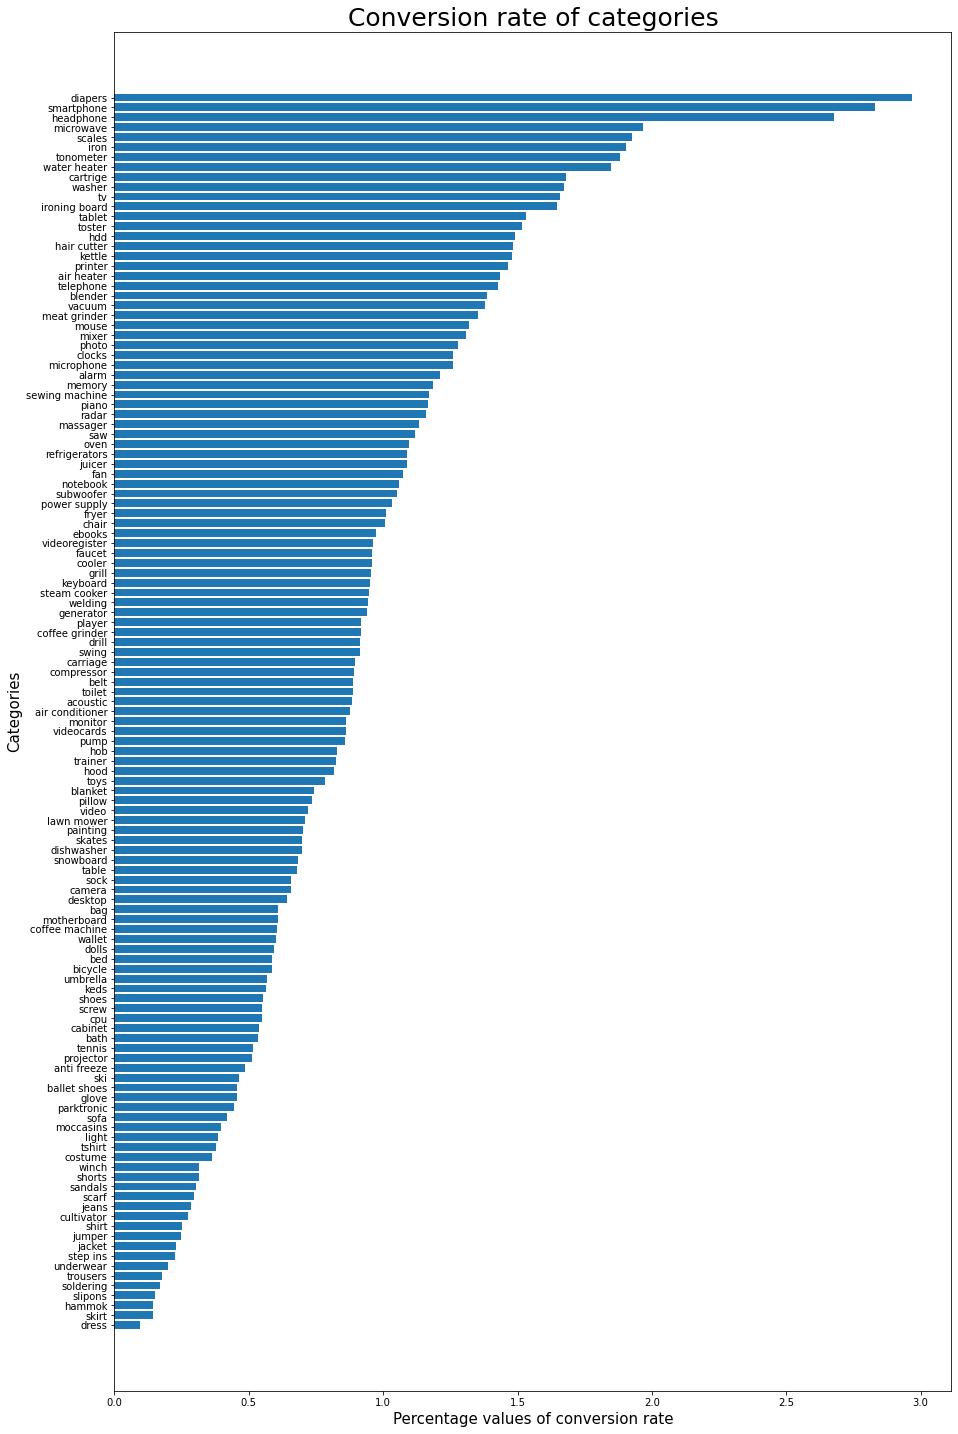

In [10]:
ds_purchase = pd.DataFrame({'purchases' : ds[(ds.event_type=='purchase')]\
    .groupby(['category_code'])['event_type'].value_counts()}).reset_index()

ds_view = pd.DataFrame({'views' : ds[(ds.event_type=='view')]\
    .groupby(['category_code'])['event_type'].value_counts()}).reset_index()

cat_purchase = ds_purchase['category_code'].dropna().to_list()
cat_rate = OrderedDict()

for cat in cat_purchase:
    v = int(ds_view[ds_view.category_code == cat]['views'])
    p = int(ds_purchase[ds_purchase.category_code == cat]['purchases'])
    cat_rate[cat] = p*100/v

dict_rate= OrderedDict(sorted(cat_rate.items(), key=itemgetter(1), reverse = True))


plt.figure(figsize=(int(len(cat_purchase)//8), int(len(cat_purchase)//5)))
plt.barh([ e.split('.')[-1].replace('_', ' ') for e in dict_rate.keys() ], dict_rate.values())
plt.gca().invert_yaxis()
plt.xlabel('Percentage values of conversion rate', fontsize=int(len(cat_purchase)//8))
plt.ylabel('Categories', fontsize=int(len(cat_purchase)//8))
plt.title('Conversion rate of categories', fontsize=int((len(cat_purchase)//5)))
plt.show()

# [RQ7]
The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your customers.
Prove that the pareto principle applies to your store.

In [2]:
ds = pd.concat([pd.read_csv('D:/Storage file PC/Documenti/Università/Data Science/Anno 1/Semestre 1/Algorthmic Methods of Data Mining/Homeworks/HW2/2019-Oct.csv',\
                    usecols=['user_id', 'event_type', 'price']),\
                pd.read_csv('D:/Storage file PC/Documenti/Università/Data Science/Anno 1/Semestre 1/Algorthmic Methods of Data Mining/Homeworks/HW2/2019-Nov.csv',\
                    usecols=['user_id', 'event_type', 'price'])])

The fuction that truncate a number

In [3]:
def truncate(n):
    n = str(n).replace('',' ').split()
    n.reverse()
    for i in range(1, len(n)):
        v = int(n[i])
        if int(n[i-1]) >= 5:
            n[i] = str(v+1)
    n.reverse()
    return int(n[0] + '0'*(len(n)-1))

The Pareto principle proves

In [6]:
ds_group_user = ds[ds.event_type == 'purchase']\
    .groupby('user_id')['price'].sum().sort_values(ascending=False)

total_user = int(len(ds_group_user))
user20 = (int(total_user)//100)*20
total_business= round(int(ds_group_user.sum()))
business80 = (int(total_business)//100)*80
business_user20 = round(int(ds_group_user.head(user20).sum()))


if truncate(business80) == truncate(business_user20):
    print('The Pareto principle is proved')
else:
    print("The Pareto principle isn't proved")

The Pareto principle is proved
